## Text Analysis on 800-53 Mapping

### Word Frequency

Sources:

https://practicaldatascience.co.uk/machine-learning/how-to-preprocess-text-for-nlp-in-four-easy-steps
https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

In [112]:
import pandas as pd
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from operator import itemgetter
nlp = spacy.load('en_core_web_sm')

In [74]:
data = pd.read_csv("800-53 Mapping Mar 1.csv")
data.head()

,Identity,Device,Network/Environment,Application Workload,Data,ZT Control Family,Primary Function,Secondary Function,ZT Control Function,ZT Control Maturity Rating,Comments,Control Identifier,Control (or Control Enhancement) Name,Control Text,Discussion,Related Controls
0,NaN,NaN,0,0,0,Multiple,NaN,NaN,Governance,Traditional,AC policies can relate to multiple pillars - i...,AC-1,Policy and Procedures,"a. Develop, document, and disseminate to [Assi...",Access control policy and procedures address t...,"IA-1, PM-9, PM-24, PS-8, SI-12 ."
1,1.0,0.0,0,0,0,Identity,NaN,NaN,All,Traditional,NaN,AC-2,Account Management,a. Define and document the types of accounts a...,Examples of system account types include indiv...,"AC-3, AC-5, AC-6, AC-17, AC-18, AC-20, AC-24, ..."
2,1.0,0.0,0,0,0,Multiple,NaN,NaN,Automation and Orchestration,Optimal,NaN,AC-2(1),Account Management | Automated System Account ...,Support the management of system accounts usin...,Automated system account management includes u...,None.
3,0.0,0.0,0,0,0,Multiple,NaN,NaN,Automation and Orchestration,Advanced,NaN,AC-2(2),Account Management | Automated Temporary and E...,Automatically [Selection: remove; disable] tem...,Management of temporary and emergency accounts...,None.
4,0.0,0.0,0,0,0,Multiple,NaN,NaN,Automation and Orchestration,Traditional,NaN,AC-2(3),Account Management | Disable Accounts,Disable accounts within [Assignment: organizat...,"Disabling expired, inactive, or otherwise anom...",None.


In [75]:
# Create control text dataframe for each pillar
identity_df = data.loc[data['Identity '] == 1][["Control Text"]] # remove the space after 'Identity' for new data
device_df = data.loc[data['Device'] == 1][["Control Text"]] 
net_env_df = data.loc[data['Network/Environment'] == 1][["Control Text"]]
app_workload_df = data.loc[data['Application Workload'] == 1][["Control Text"]]
data_df = data.loc[data['Data'] == 1][["Control Text"]]

In [76]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Claire\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [79]:
def tokenize(column):
    """
    Tokenizes a Pandas dataframe column and returns a list of tokens.
    """

    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]    

In [80]:
def remove_stopwords(tokenized_column):
    """
    Return a list of tokens with English stopwords removed. 
    """
    stops = set(stopwords.words("english"))
    return [word for word in tokenized_column if not word in stops]

In [81]:
def apply_stemming(tokenized_column):
    """
    Return a list of tokens with Porter stemming applied.
    """

    stemmer = PorterStemmer() 
    return [stemmer.stem(word) for word in tokenized_column]

In [82]:
def lemmatizer(tokenized_column):
    '''
    Return a list of tokens with lemmatizer applied.
    '''
    wordnet_lemmatizer = WordNetLemmatizer()
    return [wordnet_lemmatizer.lemmatize(word) for word in tokenized_column]

In [83]:
def rejoin_words(tokenized_column):
    """Rejoins a tokenized word list into a single string. 
    
    Args:
        tokenized_column (list): Tokenized column of words. 
        
    Returns:
        string: Single string of untokenized words. 
    """
    
    return (" ".join(tokenized_column))

#### Identity

In [84]:
identity_df['Control Text']= identity_df['Control Text'].apply(lambda x: x.lower())
identity_df['tokenized'] = identity_df.apply(lambda x: tokenize(x['Control Text']), axis=1)
identity_df['stopwords_removed'] = identity_df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
identity_df['porter_stemmed'] = identity_df.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
identity_df['msg_lemmatized'] = identity_df['stopwords_removed'].apply(lambda x: lemmatizer(x))
identity_df['rejoined_stem'] = identity_df.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
identity_df['rejoined_lem'] = identity_df.apply(lambda x: rejoin_words(x['msg_lemmatized']), axis=1)

In [106]:
with open('identity_text.txt', 'w') as f:
    f.write(identity_df['rejoined_lem'].str.cat())

In [107]:
identity_text = open('identity_text.txt', encoding="utf8").read()

In [108]:
parsed_identity_text = nlp(identity_text)

In [170]:
identity_histogram = Counter()
for token in parsed_identity_text:
    original_token_text = token.orth_
    identity_histogram[original_token_text] += 1

del identity_histogram['b']
    

identity_sorted_token_count_pairs = sorted(identity_histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))
for token, count in identity_sorted_token_count_pairs:
    print(token, ":", count)

assignment : 105
access : 41
system : 36
policy : 36
individual : 34
information : 34
role : 27
personnel : 24
account : 22
security : 22
processing : 20
personally : 18
identifiable : 18
user : 17
authenticator : 17
procedure : 16
control : 16
subject : 15
organizational : 15
time : 14
frequency : 14
following : 13
object : 12
document : 11
period : 11
authentication : 10
within : 9
group : 9
authorization : 9
attribute : 9
one : 9
mechanism : 9
privilege : 8
change : 8
management : 8
selection : 8
purpose : 8
use : 7
require : 7
review : 7
compliance : 7
requirement : 7
process : 7
associated : 7
applicable : 7
notify : 6
changing : 6
audit : 6
standard : 6
guideline : 6
update : 6
monitoring : 6
identification : 6
service : 6
device : 6
based : 5
termination : 5
transfer : 5
manage : 5
specified : 5
requiring : 5
accessing : 5
action : 5
accountability : 5
responsibility : 5
consistent : 5
law : 5
executive : 5
order : 5
directive : 5
regulation : 5
facilitate : 5
official : 5
curre

Text(0.5, 1.0, 'Identity')

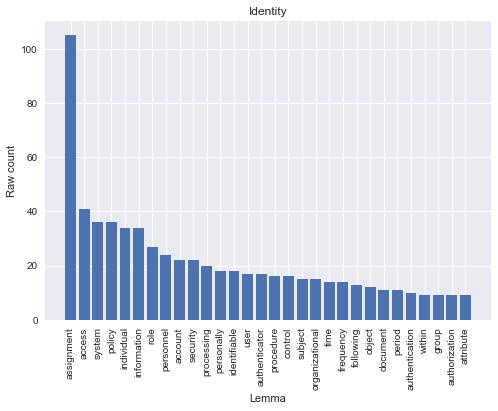

In [175]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  # prettier plots (for example, use 'ggplot' instead of 'seaborn' for plots like in R)

num_top_lemmas_to_plot = 30
top_lemmas = [lemma for lemma, count in identity_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
top_counts = [count for lemma, count in identity_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
plt.bar(range(num_top_lemmas_to_plot), top_counts)
plt.xticks(range(num_top_lemmas_to_plot), top_lemmas, rotation=90)
plt.xlabel('Lemma')
plt.ylabel('Raw count')
plt.title("Identity")

#### Device

In [118]:
device_df['Control Text']= device_df['Control Text'].apply(lambda x: x.lower())
device_df['tokenized'] = device_df.apply(lambda x: tokenize(x['Control Text']), axis=1)
device_df['stopwords_removed'] = device_df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
device_df['porter_stemmed'] = device_df.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
device_df['msg_lemmatized'] = device_df['stopwords_removed'].apply(lambda x: lemmatizer(x))
device_df['rejoined_stem'] = device_df.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
device_df['rejoined_lem'] = device_df.apply(lambda x: rejoin_words(x['msg_lemmatized']), axis=1)

In [126]:
with open('device_text.txt', 'w') as f:
    f.write(device_df['rejoined_lem'].str.cat())

In [127]:
device_text = open('device_text.txt', encoding="utf8").read()
parsed_device_text = nlp(device_text)

device_histogram = Counter()
for token in parsed_device_text:
    original_token_text = token.orth_
    device_histogram[original_token_text] += 1
    
del device_histogram['b']
del device_histogram['c']

device_sorted_token_count_pairs = sorted(device_histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))
for token, count in device_sorted_token_count_pairs:
    print(token, ":", count)

assignment : 65
system : 37
access : 27
change : 18
policy : 17
control : 15
subject : 15
following : 13
component : 13
security : 12
object : 11
device : 11
remote : 11
information : 9
one : 9
automated : 9
configuration : 9
physical : 9
attribute : 7
selection : 7
frequency : 7
monitoring : 7
using : 7
mechanism : 6
unauthorized : 5
document : 5
audit : 5
accountability : 5
review : 5
assessment : 5
support : 5
specified : 4
requirement : 4
number : 4
logon : 4
use : 4
time : 4
authorized : 4
current : 4
baseline : 4
response : 4
covered : 3
within : 3
specifies : 3
granted : 3
privilege : 3
associated : 3
rule : 3
governing : 3
based : 3
mobile : 3
consecutive : 3
attempt : 3
authentication : 3
factor : 3
user : 3
monitor : 3
implementation : 3
organizational : 3
testing : 3
personnel : 3
role : 3
procedure : 3
update : 3
event : 3
action : 3
manner : 3
proposed : 3
approval : 3
approved : 3
provide : 3
software : 3
program : 3
facility : 3
indication : 3
video : 3
application : 3
c

Text(0.5, 1.0, 'Device')

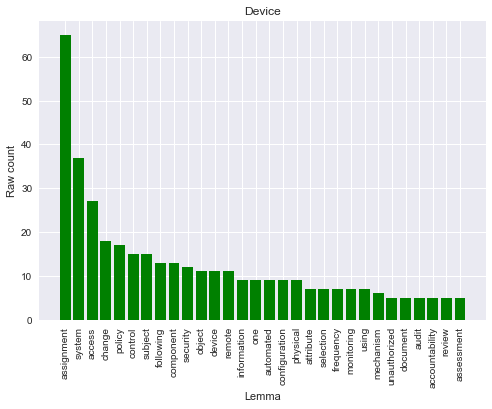

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  

num_top_lemmas_to_plot = 30
top_lemmas = [lemma for lemma, count in device_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
top_counts = [count for lemma, count in device_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
plt.bar(range(num_top_lemmas_to_plot), top_counts, color='green')
plt.xticks(range(num_top_lemmas_to_plot), top_lemmas, rotation=90)
plt.xlabel('Lemma')
plt.ylabel('Raw count')
plt.title("Device")

#### Network/Environment

In [135]:
net_env_df['Control Text']= net_env_df['Control Text'].apply(lambda x: x.lower())
net_env_df['tokenized'] = net_env_df.apply(lambda x: tokenize(x['Control Text']), axis=1)
net_env_df['stopwords_removed'] = net_env_df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
net_env_df['porter_stemmed'] = net_env_df.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
net_env_df['msg_lemmatized'] = net_env_df['stopwords_removed'].apply(lambda x: lemmatizer(x))
net_env_df['rejoined_stem'] = net_env_df.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
net_env_df['rejoined_lem'] = net_env_df.apply(lambda x: rejoin_words(x['msg_lemmatized']), axis=1)

In [140]:
with open('net_env_text.txt', 'w') as f:
    f.write(net_env_df['rejoined_lem'].str.cat())

In [146]:
net_env_text = open('net_env_text.txt', encoding="utf8").read()
parsed_net_env_text = nlp(net_env_text)

net_env_histogram = Counter()
for token in parsed_net_env_text:
    original_token_text = token.orth_
    net_env_histogram[original_token_text] += 1

del net_env_histogram['b']

net_env_sorted_token_count_pairs = sorted(net_env_histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))
for token, count in net_env_sorted_token_count_pairs:
    print(token, ":", count)

assignment : 157
system : 124
information : 46
control : 42
component : 39
following : 34
security : 27
access : 25
policy : 23
selection : 22
change : 21
external : 21
type : 19
mechanism : 19
monitoring : 19
frequency : 17
cryptographic : 17
one : 16
event : 15
subject : 14
unauthorized : 14
automated : 14
using : 14
network : 13
time : 12
object : 11
communication : 11
assessment : 11
traffic : 11
within : 10
attribute : 10
support : 10
action : 10
software : 10
source : 10
key : 10
audit : 9
flow : 9
processing : 9
configuration : 9
individual : 9
use : 9
function : 9
physical : 9
internal : 9
storage : 9
rule : 8
document : 8
remote : 8
authorized : 8
organizational : 8
data : 8
accordance : 8
service : 8
managed : 8
interface : 8
exception : 8
protection : 8
c : 7
connection : 7
official : 7
logging : 7
identified : 7
continuous : 7
code : 7
prevent : 7
boundary : 7
authoritative : 7
specified : 6
session : 6
requirement : 6
identify : 6
personnel : 6
review : 6
update : 6
user :

Text(0.5, 1.0, 'Network/Environment')

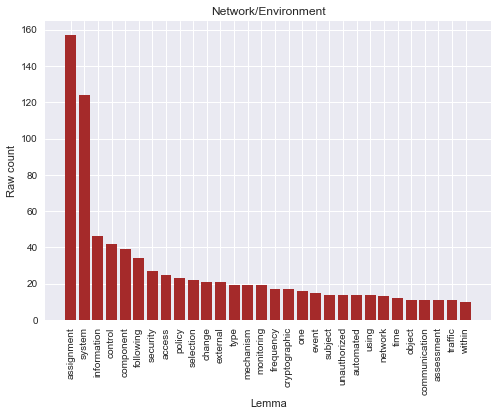

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  

num_top_lemmas_to_plot = 30
top_lemmas = [lemma for lemma, count in net_env_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
top_counts = [count for lemma, count in net_env_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
plt.bar(range(num_top_lemmas_to_plot), top_counts, color='brown')
plt.xticks(range(num_top_lemmas_to_plot), top_lemmas, rotation=90)
plt.xlabel('Lemma')
plt.ylabel('Raw count')
plt.title("Network/Environment")

#### Application Workload

In [148]:
app_workload_df['Control Text']= app_workload_df['Control Text'].apply(lambda x: x.lower())
app_workload_df['tokenized'] = app_workload_df.apply(lambda x: tokenize(x['Control Text']), axis=1)
app_workload_df['stopwords_removed'] = app_workload_df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
app_workload_df['porter_stemmed'] = app_workload_df.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
app_workload_df['msg_lemmatized'] = app_workload_df['stopwords_removed'].apply(lambda x: lemmatizer(x))
app_workload_df['rejoined_stem'] = app_workload_df.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
app_workload_df['rejoined_lem'] = app_workload_df.apply(lambda x: rejoin_words(x['msg_lemmatized']), axis=1)

In [149]:
with open('app_workload_text.txt', 'w') as f:
    f.write(app_workload_df['rejoined_lem'].str.cat())

In [154]:
app_workload_text = open('app_workload_text.txt', encoding="utf8").read()
parsed_app_workload_text = nlp(app_workload_text)

app_workload_histogram = Counter()
for token in parsed_app_workload_text:
    original_token_text = token.orth_
    app_workload_histogram[original_token_text] += 1

del app_workload_histogram['b']
del app_workload_histogram['c']

app_workload_sorted_token_count_pairs = sorted(app_workload_histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))
for token, count in app_workload_sorted_token_count_pairs:
    print(token, ":", count)

assignment : 49
system : 38
change : 18
policy : 17
component : 17
control : 14
subject : 14
information : 13
access : 12
security : 12
object : 11
following : 11
automated : 11
configuration : 9
attribute : 7
using : 7
frequency : 6
monitoring : 6
baseline : 6
unauthorized : 5
document : 5
audit : 5
accountability : 5
assessment : 5
internal : 5
approval : 5
software : 5
specified : 4
privilege : 4
one : 4
limited : 4
personnel : 4
role : 4
compliance : 4
code : 4
source : 4
covered : 3
across : 3
specifies : 3
granted : 3
associated : 3
rule : 3
governing : 3
authentication : 3
selection : 3
procedure : 3
review : 3
update : 3
current : 3
part : 3
accuracy : 3
currency : 3
availability : 3
connection : 3
privacy : 3
requirement : 3
environment : 3
mechanism : 3
proposed : 3
approved : 3
program : 3
authorized : 3
inventory : 3
medium : 3
authorization : 2
set : 2
within : 2
changing : 2
newly : 2
created : 2
defined : 2
e : 2
revocation : 2
based : 2
used : 2
management : 2
organizat

Text(0.5, 1.0, 'Application Workload')

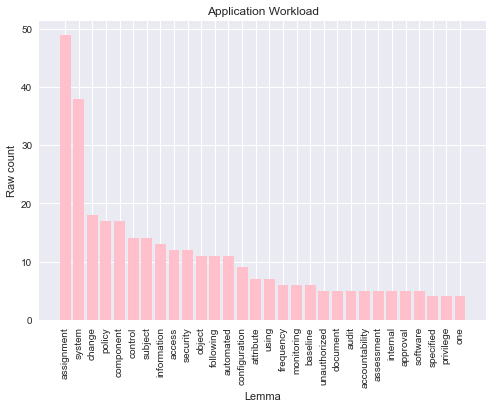

In [155]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  

num_top_lemmas_to_plot = 30
top_lemmas = [lemma for lemma, count in app_workload_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
top_counts = [count for lemma, count in app_workload_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
plt.bar(range(num_top_lemmas_to_plot), top_counts, color='pink')
plt.xticks(range(num_top_lemmas_to_plot), top_lemmas, rotation=90)
plt.xlabel('Lemma')
plt.ylabel('Raw count')
plt.title("Application Workload")

#### Data

In [188]:
data_df['Control Text']= data_df['Control Text'].apply(lambda x: x.lower())
# data_df['tokenized'] = data_df.apply(lambda x: tokenize(x['Control Text']), axis=1)
# data_df['stopwords_removed'] = data_df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
# data_df['porter_stemmed'] = data_df.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
# data_df['msg_lemmatized'] = data_df['stopwords_removed'].apply(lambda x: lemmatizer(x))
# data_df['rejoined_stem'] = data_df.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
# data_df['rejoined_lem'] = data_df.apply(lambda x: rejoin_words(x['msg_lemmatized']), axis=1)

AttributeError: 'float' object has no attribute 'lower'

### Topic Modeling

Each document is part of multiple topics. Each topic consists of a bunch of regularly co-occurring words. 

In [209]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=5, suppress=True)

#### Identity

In [230]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(list(identity_df['rejoined_lem']))


In [231]:
tf.shape # 59 rows (corresponding to controls) and 440 columns (corresponding to words)

(59, 440)

In [224]:
# fit an LDA model to the data
num_topics = 4

from sklearn.decomposition import LatentDirichletAllocation

# n_components: number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)

# lda.fit accepts a sparse matrix tf
lda.fit(tf)

LatentDirichletAllocation(n_components=4, random_state=0)

In [225]:
num_top_words = 20

def print_top_words(topic_word_distributions, num_top_words, vectorizer):
    vocab = vectorizer.get_feature_names()
    num_topics = len(topic_word_distributions)
    print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
    print()

    for topic_idx in range(num_topics):
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(-topic_word_distributions[topic_idx])
        for rank in range(num_top_words):
            word_idx = sort_indices[rank]
            print(vocab[word_idx], ':',
                  topic_word_distributions[topic_idx, word_idx])
        print()

topic_word_distributions = np.array([row / row.sum() for row in lda.components_])
print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
assignment : 0.0658465145598676
policy : 0.03325828946551021
role : 0.023611316683136385
procedure : 0.01984656698050191
personnel : 0.018340288697015837
authentication : 0.015188908235700446
individual : 0.014886038438287903
information : 0.013737980376324314
frequency : 0.012368963036665103
following : 0.012361502064049734
event : 0.012355421393663213
security : 0.012102198111963171
user : 0.011134040178015897
organizational : 0.010862326207181233
system : 0.00942312099481453
identification : 0.009358707204767499
selection : 0.009356955048911889
time : 0.009354910902652586
period : 0.009354910902652586
management : 0.009286685936469821

[Topic 1]
assignment : 0.042324183887066394
account : 0.0342445668381345
system : 0.02008666626825231
user : 0.02003490802722082
access : 0.018251904620273644
individual : 0.016576618694320536
assessment : 0.01656059126481398
period : 0.01428646985992865
time 

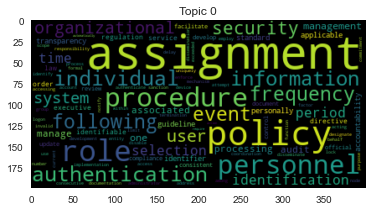

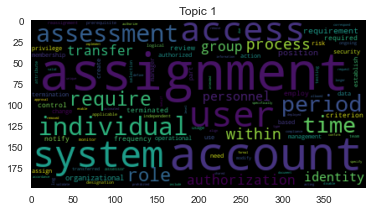

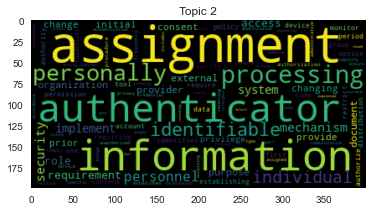

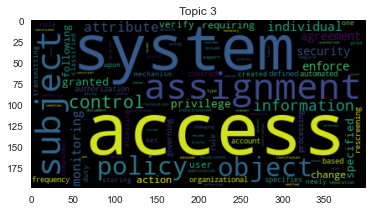

In [226]:
from wordcloud import WordCloud

num_max_word_cloud_words = 100

vocab = tf_vectorizer.get_feature_names()
num_topics = len(topic_word_distributions)

for topic_idx in range(num_topics):
    wc = WordCloud(max_words=num_max_word_cloud_words)
    wc.generate_from_frequencies(dict(zip(vocab, topic_word_distributions[topic_idx])))
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.title('Topic %d' % topic_idx)
    plt.grid(None)

In [215]:
def compute_average_num_unique_words(topic_word_distributions, num_top_words, vectorizer, verbose=True):
    vocab = vectorizer.get_feature_names()
    num_topics = len(topic_word_distributions)
    average_number_of_unique_top_words = 0
    for topic_idx1 in range(num_topics):
        if verbose:
            print('[Topic ', topic_idx1, ']', sep='')
        
        sort_indices1 = np.argsort(topic_word_distributions[topic_idx1])[::-1]
        num_unique_top_words = 0
        for top_word_idx1 in sort_indices1[:num_top_words]:
            word1 = vocab[top_word_idx1]
            break_ = False
            for topic_idx2 in range(num_topics):
                if topic_idx1 != topic_idx2:
                    sort_indices2 = np.argsort(topic_word_distributions[topic_idx2])[::-1]
                    for top_word_idx2 in sort_indices2[:num_top_words]:
                        word2 = vocab[top_word_idx2]
                        if word1 == word2:
                            break_ = True
                            break
                    if break_:
                        break
            else:
                num_unique_top_words += 1
        if verbose:
            print('Number of unique top words:', num_unique_top_words)
            print()

        average_number_of_unique_top_words += num_unique_top_words
    average_number_of_unique_top_words /= num_topics
    
    if verbose:
        print('Average number of unique top words:', average_number_of_unique_top_words)
    
    return average_number_of_unique_top_words

In [219]:
def log_prob_see_word1_given_see_word2(word1, word2, vectorizer, eps=0.1):
    word1_column_idx = vectorizer.vocabulary_[word1]
    word2_column_idx = vectorizer.vocabulary_[word2]
    documents_with_word1 = (tf[:, word1_column_idx].toarray().flatten() > 0)
    documents_with_word2 = (tf[:, word2_column_idx].toarray().flatten() > 0)
    documents_with_both_word1_and_word2 = documents_with_word1 * documents_with_word2
    return np.log2((documents_with_both_word1_and_word2.sum() + eps) / documents_with_word2.sum())

In [220]:
def compute_average_coherence(topic_word_distributions, num_top_words, vectorizer, verbose=True):
    vocab = vectorizer.get_feature_names()
    num_topics = len(topic_word_distributions)
    average_coherence = 0
    for topic_idx in range(num_topics):
        if verbose:
            print('[Topic ', topic_idx, ']', sep='')
        
        sort_indices = np.argsort(topic_word_distributions[topic_idx])[::-1]
        coherence = 0.
        for top_word_idx1 in sort_indices[:num_top_words]:
            word1 = vocab[top_word_idx1]
            for top_word_idx2 in sort_indices[:num_top_words]:
                word2 = vocab[top_word_idx2]
                if top_word_idx1 != top_word_idx2:
                    coherence += log_prob_see_word1_given_see_word2(word1, word2, vectorizer, 0.1)
        
        if verbose:
            print('Coherence:', coherence)
            print()
        average_coherence += coherence
    average_coherence /= num_topics
    if verbose:
        print('Average coherence:', average_coherence)
    return average_coherence

In [222]:
k_values = range(2, 11)
avg_coherences = []
avg_num_unique_words = []

for k in k_values:
    lda_candidate = LatentDirichletAllocation(n_components=k, random_state=0)
    lda_candidate.fit(tf)
    topic_word_distributions = np.array([row / row.sum() for row in lda_candidate.components_])
    print('-' * 80)
    print('Number of topics:', k)
    print()
    print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)
    print()
    print()
    
    avg_coherences.append(compute_average_coherence(topic_word_distributions, num_top_words, tf_vectorizer, False))
    avg_num_unique_words.append(compute_average_num_unique_words(topic_word_distributions, num_top_words, tf_vectorizer, False))

--------------------------------------------------------------------------------
Number of topics: 2

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
assignment : 0.062004179349601195
information : 0.025308296314111103
policy : 0.021020503295016982
role : 0.019900798893087112
individual : 0.0192973890033293
personnel : 0.01887002702927506
processing : 0.018104086852953366
personally : 0.015609142318893944
identifiable : 0.015609142318893944
authenticator : 0.014728661935273887
procedure : 0.013885433265692556
system : 0.012169371109923135
security : 0.011860983674948504
mechanism : 0.009694180249279524
authentication : 0.009636162857819212
frequency : 0.009137582332634342
event : 0.008015662684527398
user : 0.007895175077311871
time : 0.007779606591626404
period : 0.007779603302453875

[Topic 1]
access : 0.04556891446661212
assignment : 0.0367066102221421
system : 0.02887276523625795
subject : 0.01749603954509266
account : 0.0166955656477035

Text(0, 0.5, 'Average coherence')

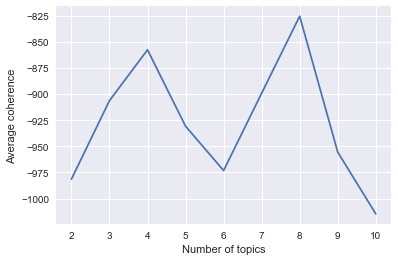

In [223]:
plt.plot(k_values, avg_coherences)
plt.xlabel('Number of topics')
plt.ylabel('Average coherence')

#### Device

In [233]:
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(list(device_df['rejoined_lem']))

In [234]:
tf.shape # 55 controls, 376 words

(55, 376)

In [237]:
k_values = range(2, 20)
avg_coherences = []
avg_num_unique_words = []

for k in k_values:
    lda_candidate = LatentDirichletAllocation(n_components=k, random_state=0)
    lda_candidate.fit(tf)
    topic_word_distributions = np.array([row / row.sum() for row in lda_candidate.components_])
    print('-' * 80)
    print('Number of topics:', k)
    print()
    print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)
    print()
    print()
    
    avg_coherences.append(compute_average_coherence(topic_word_distributions, num_top_words, tf_vectorizer, False))
    avg_num_unique_words.append(compute_average_num_unique_words(topic_word_distributions, num_top_words, tf_vectorizer, False))

--------------------------------------------------------------------------------
Number of topics: 2

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
assignment : 0.06590663382380053
system : 0.03346905418340471
access : 0.02114431838253556
change : 0.016854022592963
mechanism : 0.01659326390440962
device : 0.016577785992293034
remote : 0.0152860470442382
physical : 0.012576601294708008
automated : 0.011076089579488904
using : 0.009930112932103108
policy : 0.009586974796719225
frequency : 0.008742469718786217
review : 0.00864045843451349
use : 0.00858839052007194
following : 0.008510225249848789
control : 0.007529398208837137
audit : 0.007312235077627003
accountability : 0.007312235077627003
number : 0.007310129546906013
monitor : 0.007275611288668079

[Topic 1]
system : 0.02986760259049564
assignment : 0.029204399688118908
subject : 0.025887534872960027
component : 0.024997451553161486
control : 0.020668396403441893
access : 0.0202669957264

Text(0, 0.5, 'Average coherence')

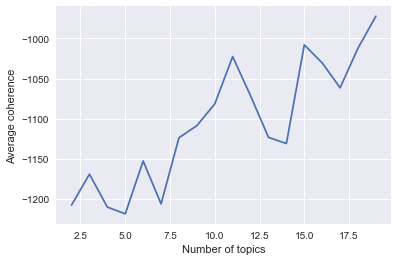

In [238]:
plt.plot(k_values, avg_coherences)
plt.xlabel('Number of topics')
plt.ylabel('Average coherence')

In [239]:
# fit an LDA model to the data
num_topics = 11

from sklearn.decomposition import LatentDirichletAllocation

# n_components: number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)

# lda.fit accepts a sparse matrix tf
lda.fit(tf)

LatentDirichletAllocation(n_components=11, random_state=0)

In [240]:
num_top_words = 20

def print_top_words(topic_word_distributions, num_top_words, vectorizer):
    vocab = vectorizer.get_feature_names()
    num_topics = len(topic_word_distributions)
    print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
    print()

    for topic_idx in range(num_topics):
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(-topic_word_distributions[topic_idx])
        for rank in range(num_top_words):
            word_idx = sort_indices[rank]
            print(vocab[word_idx], ':',
                  topic_word_distributions[topic_idx, word_idx])
        print()

topic_word_distributions = np.array([row / row.sum() for row in lda.components_])
print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
access : 0.058333439092015625
system : 0.04710467944794447
assignment : 0.040000783800942546
physical : 0.03686863101608533
device : 0.02238459173593325
mechanism : 0.02238455216539748
remote : 0.022384534014413534
circumstance : 0.022384533008678247
change : 0.02238448919537162
monitor : 0.018937660745667013
control : 0.01807010075090568
connection : 0.015142500274487275
mobile : 0.015142496131954638
requirement : 0.015142495963690873
automated : 0.015142455561249782
configuration : 0.015142450677198254
facility : 0.015142439921523065
component : 0.015142426357869903
using : 0.0090771629069878
establish : 0.00790043285073384

[Topic 1]
system : 0.04223621605705927
configuration : 0.02857156141742205
component : 0.028571555178666216
current : 0.028571519023788218
meeting : 0.028571427992024306
inventory : 0.014906883912640072
verify : 0.01490686950768123
operating : 0.01490685877459053
implemen

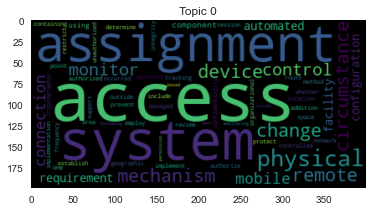

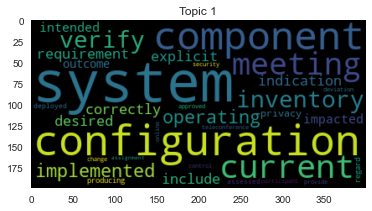

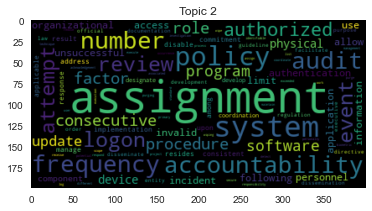

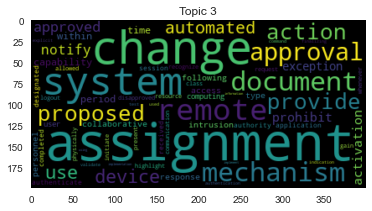

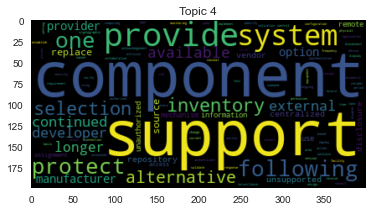

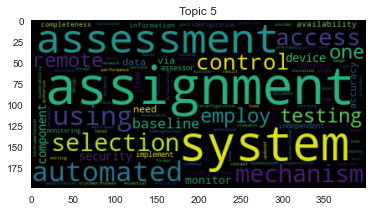

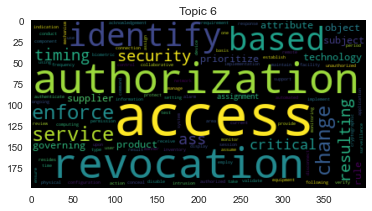

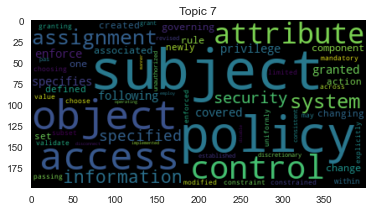

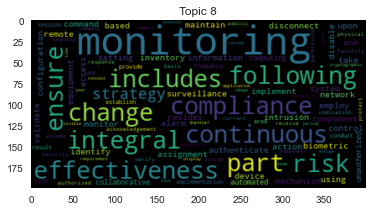

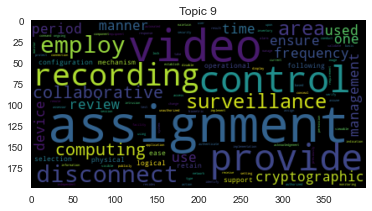

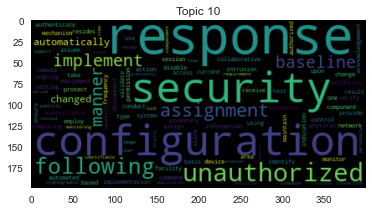

In [241]:
from wordcloud import WordCloud

num_max_word_cloud_words = 100

vocab = tf_vectorizer.get_feature_names()
num_topics = len(topic_word_distributions)

for topic_idx in range(num_topics):
    wc = WordCloud(max_words=num_max_word_cloud_words)
    wc.generate_from_frequencies(dict(zip(vocab, topic_word_distributions[topic_idx])))
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.title('Topic %d' % topic_idx)
    plt.grid(None)

### Network/Environment

In [242]:
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(list(net_env_df['rejoined_lem']))

In [243]:
k_values = range(2, 20)
avg_coherences = []
avg_num_unique_words = []

for k in k_values:
    lda_candidate = LatentDirichletAllocation(n_components=k, random_state=0)
    lda_candidate.fit(tf)
    topic_word_distributions = np.array([row / row.sum() for row in lda_candidate.components_])
    print('-' * 80)
    print('Number of topics:', k)
    print()
    print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)
    print()
    print()
    
    avg_coherences.append(compute_average_coherence(topic_word_distributions, num_top_words, tf_vectorizer, False))
    avg_num_unique_words.append(compute_average_num_unique_words(topic_word_distributions, num_top_words, tf_vectorizer, False))

--------------------------------------------------------------------------------
Number of topics: 2

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
assignment : 0.05831401202378816
system : 0.04545323208630546
component : 0.018695762415539316
access : 0.014877804719943271
following : 0.01385065457332919
information : 0.012621372009200979
change : 0.011601747112566485
type : 0.011436182864892907
policy : 0.011314076217496397
control : 0.010332737768661194
event : 0.010232494242356269
employ : 0.008684947215591907
subject : 0.008506494446644941
mechanism : 0.007840894028246085
automated : 0.007489384249155004
frequency : 0.007405969171510341
using : 0.0074029767449864245
selection : 0.007025326113115399
object : 0.0067464101350033735
attribute : 0.006669797476391389

[Topic 1]
assignment : 0.03914864136500154
system : 0.036469612246845064
information : 0.020024207533929122
control : 0.01930235124178392
external : 0.014044147971960975
impleme

Text(0, 0.5, 'Average coherence')

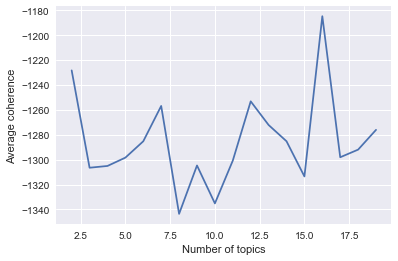

In [244]:
plt.plot(k_values, avg_coherences)
plt.xlabel('Number of topics')
plt.ylabel('Average coherence')

In [248]:
# fit an LDA model to the data
num_topics = 2

from sklearn.decomposition import LatentDirichletAllocation

# n_components: number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)

# lda.fit accepts a sparse matrix tf
lda.fit(tf)

LatentDirichletAllocation(n_components=2, random_state=0)

In [249]:
num_top_words = 20

def print_top_words(topic_word_distributions, num_top_words, vectorizer):
    vocab = vectorizer.get_feature_names()
    num_topics = len(topic_word_distributions)
    print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
    print()

    for topic_idx in range(num_topics):
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(-topic_word_distributions[topic_idx])
        for rank in range(num_top_words):
            word_idx = sort_indices[rank]
            print(vocab[word_idx], ':',
                  topic_word_distributions[topic_idx, word_idx])
        print()

topic_word_distributions = np.array([row / row.sum() for row in lda.components_])
print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
assignment : 0.05831401202378816
system : 0.04545323208630546
component : 0.018695762415539316
access : 0.014877804719943271
following : 0.01385065457332919
information : 0.012621372009200979
change : 0.011601747112566485
type : 0.011436182864892907
policy : 0.011314076217496397
control : 0.010332737768661194
event : 0.010232494242356269
employ : 0.008684947215591907
subject : 0.008506494446644941
mechanism : 0.007840894028246085
automated : 0.007489384249155004
frequency : 0.007405969171510341
using : 0.0074029767449864245
selection : 0.007025326113115399
object : 0.0067464101350033735
attribute : 0.006669797476391389

[Topic 1]
assignment : 0.03914864136500154
system : 0.036469612246845064
information : 0.020024207533929122
control : 0.01930235124178392
external : 0.014044147971960975
implement : 0.012426452214831345
component : 0.011253260088908536
monitoring : 0.011107710269544909
security 

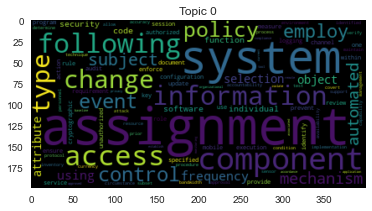

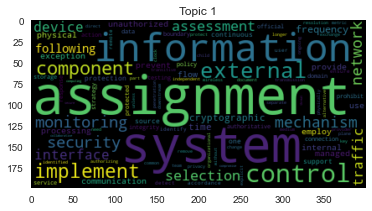

In [250]:
from wordcloud import WordCloud

num_max_word_cloud_words = 100

vocab = tf_vectorizer.get_feature_names()
num_topics = len(topic_word_distributions)

for topic_idx in range(num_topics):
    wc = WordCloud(max_words=num_max_word_cloud_words)
    wc.generate_from_frequencies(dict(zip(vocab, topic_word_distributions[topic_idx])))
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.title('Topic %d' % topic_idx)
    plt.grid(None)